(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week07/notebook/demo.ipynb)

# `pandas` series data type

In [3]:
import pandas as pd

sample_data = pd.read_csv('../data/sample.csv')
sample_data.head(3)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30


In [4]:
type(sample_data)

pandas.core.frame.DataFrame

In [6]:
sample_ts = sample_data.set_index('Date')

In [7]:
sample_ts.head(3)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30


In [9]:
type(sample_ts.Births)

pandas.core.series.Series

In [10]:
sample_ts.Births.head(3)

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
Name: Births, dtype: int64

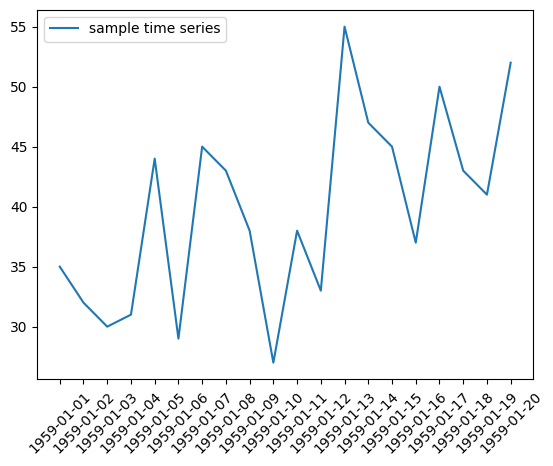

In [21]:
import matplotlib.pyplot as plt

plt.plot(sample_ts[:20], label='sample time series')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [1]:
%%sh

ls -l ../data

total 16
-rw-r--r--@ 1 xiangshiyin  staff  5855 Feb 24 01:24 sample.csv


## Time Series data - Example: S&P 500 Index

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

stock_symbol = '^GSPC'
start_date = '2020-01-01'
end_date = '2024-12-31'

# Download historical data
df_sp500 = yf.download(stock_symbol, start=start_date, end=end_date)
df_sp500.head(10)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000
2020-01-09,3274.699951,3275.580078,3263.669922,3266.030029,3641230000
2020-01-10,3265.350098,3282.989990,3260.860107,3281.810059,3214580000
2020-01-13,3288.129883,3288.129883,3268.429932,3271.129883,3459390000


In [12]:
type(df_sp500)

pandas.core.frame.DataFrame

In [15]:
df_sp500['Close'].head(3)

Ticker,^GSPC
Date,
2020-01-02,3257.850098
2020-01-03,3234.850098
2020-01-06,3246.280029


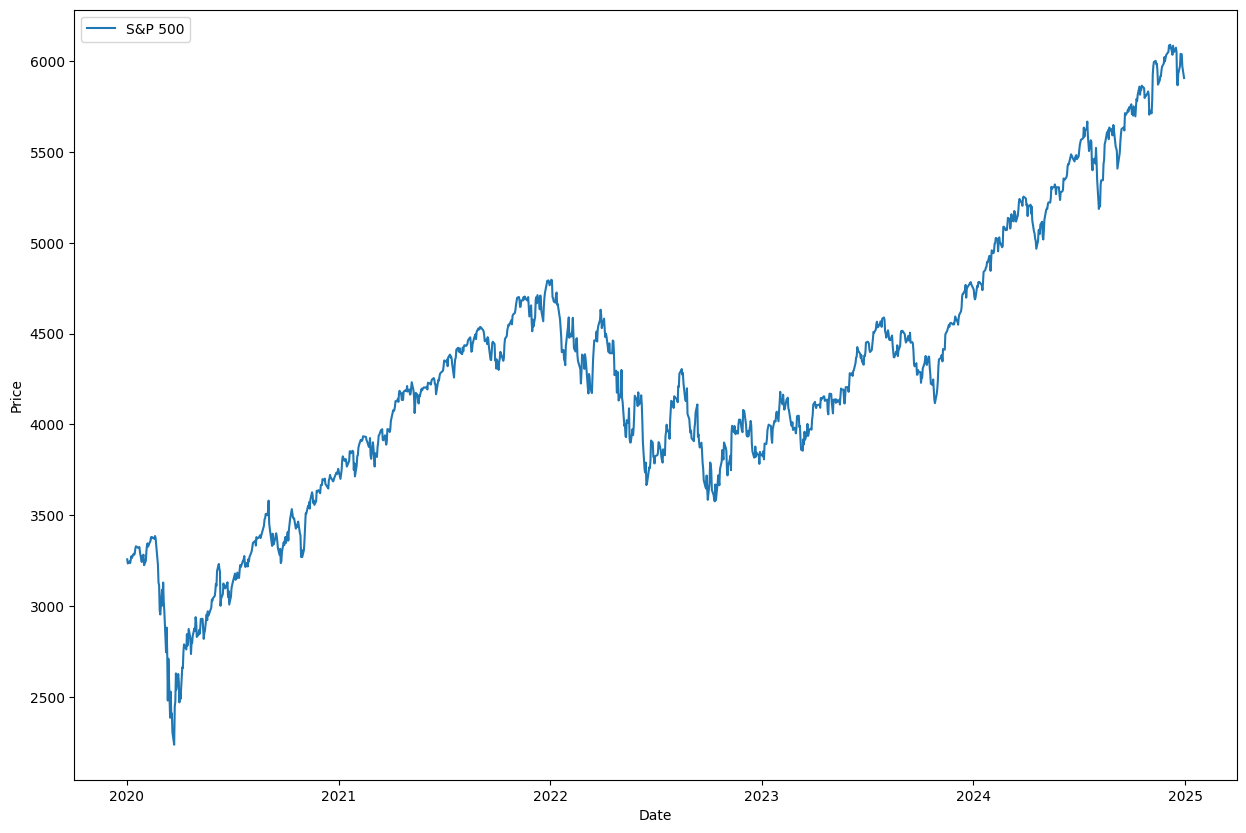

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(df_sp500['Close'], label='S&P 500')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


## Time Sereies Decomposition

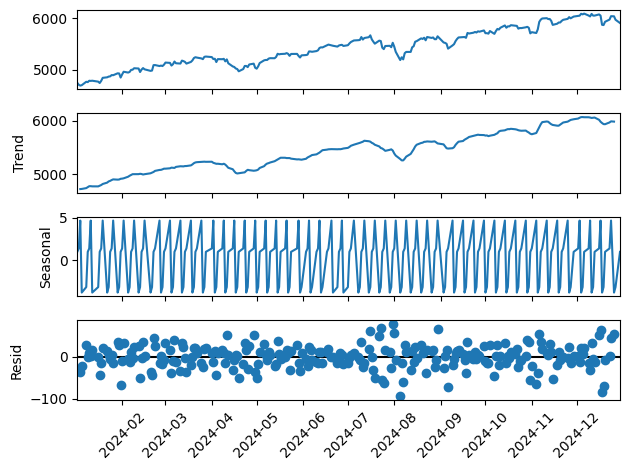

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df_sp500.Close.loc['2024-01-01':'2024-12-31'], period=5).plot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

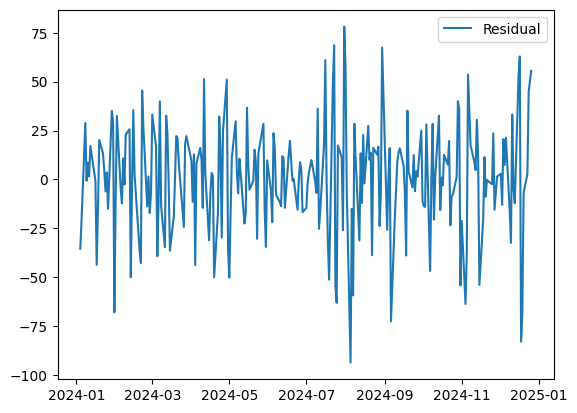

In [22]:
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(df_sp500.Close.loc['2024-01-01':'2024-12-31'], period=5)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()

### Trend

The autocorrelation function (ACF) is a statistical tool to analyze the relationship between the current value of a time series and its lagged values.

$$
ACF(h) = \frac{Cov(y_t, y_{t-h})}{Var(y_t)} = \frac{\sum_{t=h+1}^{T} (y_t - \bar{y})(y_{t-h} - \bar{y})}{\sum_{t=1}^{T} (y_t - \bar{y})^2}
$$

where:
- $T$ is the total number of observations.
- $y_t$ is the value of the time series at time $t$.
- $\bar{y}$ is the mean of the time series.
- $h$ is the lag.

Strong correlations in the ACF plot indicate that the time series has:
- **Significant memory** (dependence on past values).
- **Trends** (slowly decaying correlations).
- **Seasonality** (periodic spikes at regular intervals).

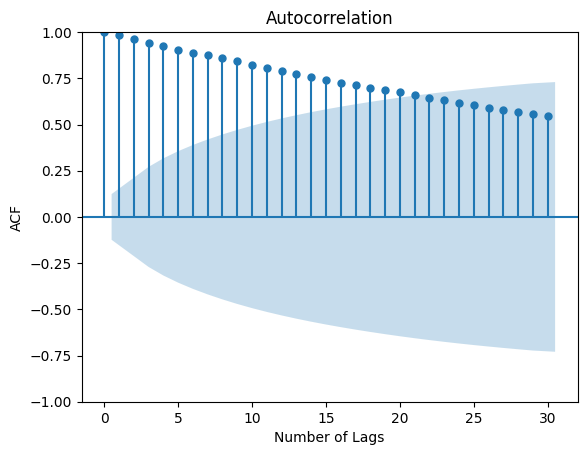

In [23]:
# plot autocorrelation function(ACF)

sm.graphics.tsa.plot_acf(df_sp500.Close.loc['2024-01-01':'2024-12-31'], lags=30)
plt.xlabel('Number of Lags')
plt.ylabel('ACF')
plt.show()

The partial autocrelation plot (PACF) is a graphical method used to determine the order of an autoregressive (AR) model. It helps identify the significant lagged values that contribute to the behavior of the time series.

$$
PACF(h) = \frac{Cov(y_t, y_{t-h}|y_{t-1},y_{t-2},...,y_{t-h+1})}{\sqrt{Var(y_t|y_{t-1},y_{t-2},...,y_{t-h+1})} \sqrt{Var(y_{t-h}|y_{t-1},y_{t-2},...,y_{t-h+1})}}
$$

Where:
- $y_t$ is the time series at time $t$.
- $h$ is the lag.

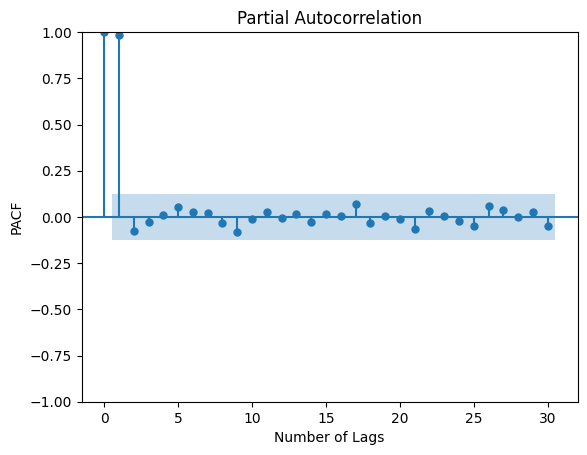

In [24]:
# plot partial autocorrelation function (PACF)

sm.graphics.tsa.plot_pacf(df_sp500.Close.loc['2024-01-01':'2024-12-31'], lags=30)
plt.xlabel('Number of Lags')
plt.ylabel('PACF')
plt.show()

### Seasonality

#### S&P 500

In [26]:
## plot YOY trend

df2 = df_sp500.Close.copy()
df2.columns = ['GSPC']
df2['Year'] = df2.index.year
df2['DayOfYear'] = df2.index.dayofyear
df2.head(3)

,GSPC,Year,DayOfYear
Date,,,
2020-01-02,3257.850098,2020,2
2020-01-03,3234.850098,2020,3
2020-01-06,3246.280029,2020,6


In [27]:
df2_yoy = df2.pivot(index='DayOfYear', columns='Year', values='GSPC')
df2_yoy.head(3)

Year,2020,2021,2022,2023,2024
DayOfYear,,,,,
2,3257.850098,NaN,NaN,NaN,4742.830078
3,3234.850098,NaN,4796.560059,3824.139893,4704.810059
4,NaN,3700.649902,4793.540039,3852.969971,4688.680176


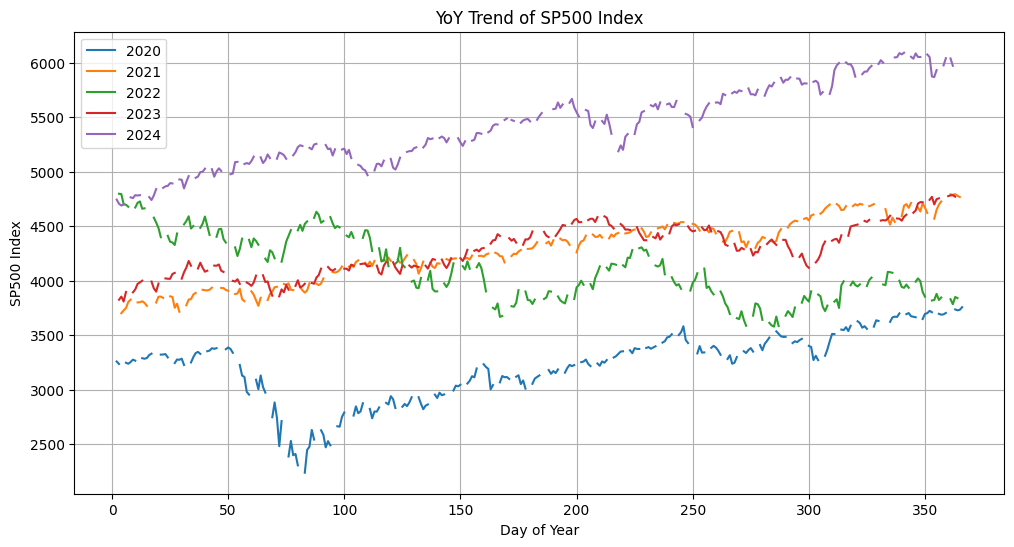

In [28]:
plt.figure(figsize=(12, 6))
for year in df2_yoy.columns:
    plt.plot(df2_yoy.index, df2_yoy[year], label=year)
plt.legend()
plt.title('YoY Trend of SP500 Index')
plt.xlabel('Day of Year')
plt.ylabel('SP500 Index')
plt.grid()
plt.show()

In [29]:
df3 = df_sp500.Close.copy().rename(columns={'^GSPC': 'GSPC'})
df3['Year'] = df3.index.year
df3['Week'] = df3.index.isocalendar().week
df3.head(3)

Ticker,GSPC,Year,Week
Date,,,
2020-01-02,3257.850098,2020,1
2020-01-03,3234.850098,2020,1
2020-01-06,3246.280029,2020,2


In [30]:
df3_weekly = df3.groupby(['Year', 'Week'])['GSPC'].mean().reset_index()
df3_weekly.head(3)

,Year,Week,GSPC
0,2020,1,3246.350098
1,2020,2,3255.312012
2,2020,3,3301.400000


In [31]:
df3_weekly_yoy = df3_weekly.pivot(index='Week', columns='Year', values='GSPC')
df3_weekly_yoy.head(3)

Year,2020,2021,2022,2023,2024
Week,,,,,
1,3246.350098,3760.823975,4732.751953,3845.072510,4948.100098
2,3255.312012,3794.886035,4686.317969,3952.642041,4773.512109
3,3301.400000,3836.325012,4497.634888,3947.822571,4781.484985


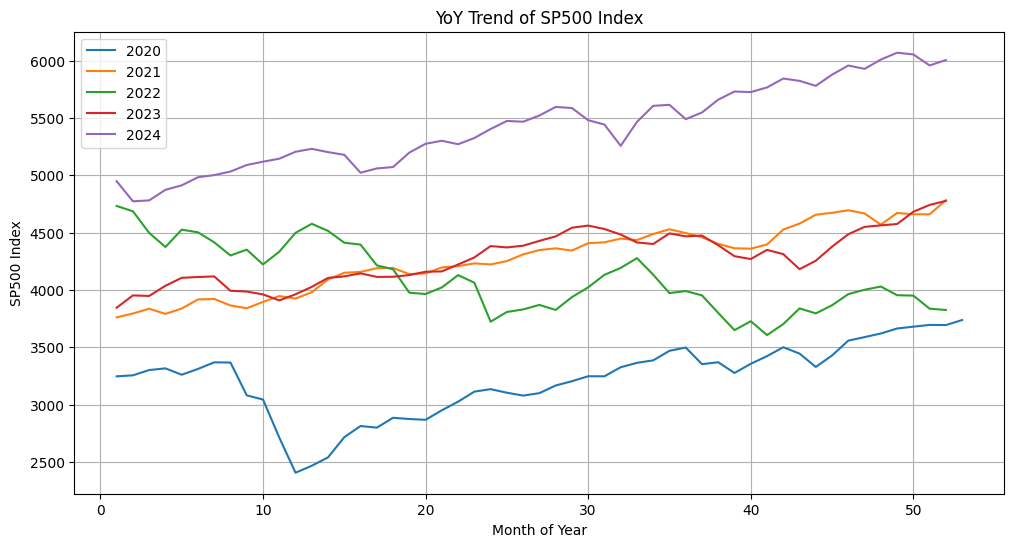

In [32]:
plt.figure(figsize=(12, 6))
for year in df3_weekly_yoy.columns:
    plt.plot(df3_weekly_yoy.index, df3_weekly_yoy[year], label=year)
plt.legend()
plt.title('YoY Trend of SP500 Index')
plt.xlabel('Month of Year')
plt.ylabel('SP500 Index')
plt.grid()
plt.show()

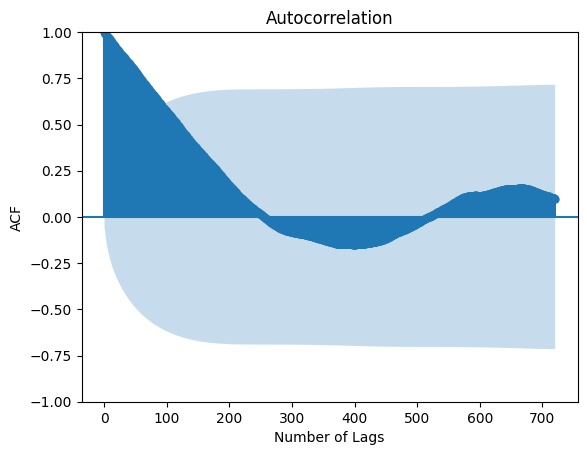

In [33]:
# plot autocorrelation function(ACF)

sm.graphics.tsa.plot_acf(df3.GSPC, lags=720)
plt.xlabel('Number of Lags')
plt.ylabel('ACF')
plt.show()

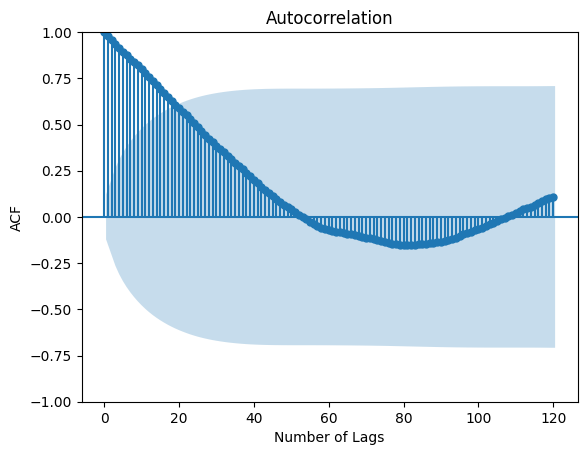

In [34]:
# plot autocorrelation function(ACF)

sm.graphics.tsa.plot_acf(df3_weekly.GSPC, lags=120)
plt.xlabel('Number of Lags')
plt.ylabel('ACF')
plt.show()

#### AAPL

In [35]:
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-12-31'

# Download historical data
df_aapl = yf.download(stock_symbol, start=start_date, end=end_date).Close
df_aapl.head(10)

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2020-01-02,72.716080
2020-01-03,72.009132
2020-01-06,72.582916
2020-01-07,72.241562
2020-01-08,73.403656
2020-01-09,74.962791
2020-01-10,75.132256
2020-01-13,76.737411
2020-01-14,75.701210


In [36]:
df_aapl['Year'] = df_aapl.index.year
df_aapl['DayOfYear'] = df_aapl.index.dayofyear

df_aapl.head(3)

Ticker,AAPL,Year,DayOfYear
Date,,,
2020-01-02,72.716080,2020,2
2020-01-03,72.009132,2020,3
2020-01-06,72.582916,2020,6


In [37]:
df_aapl_yoy = df_aapl.pivot(index='DayOfYear', columns='Year', values='AAPL')

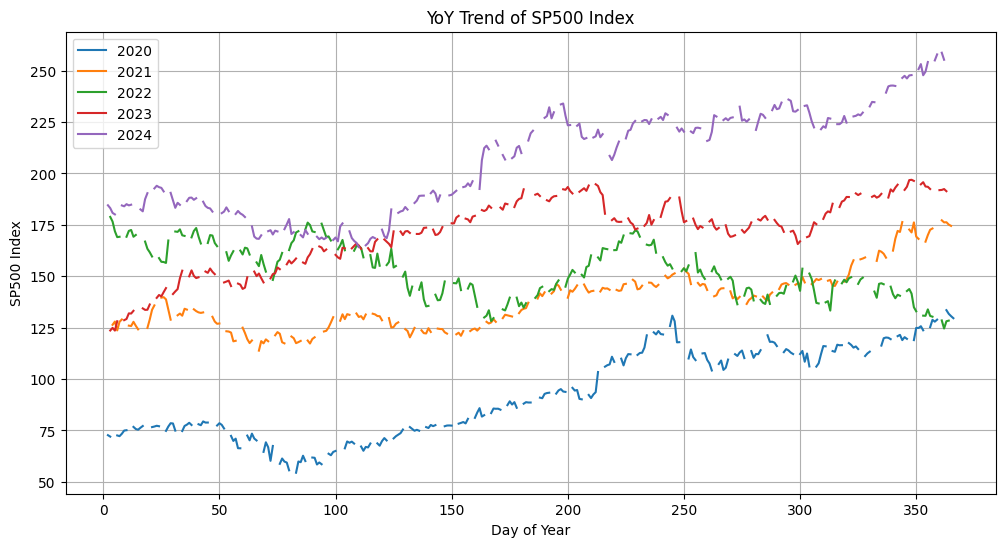

In [38]:
plt.figure(figsize=(12, 6))
for year in df_aapl_yoy.columns:
    plt.plot(df_aapl_yoy.index, df_aapl_yoy[year], label=year)
plt.legend()
plt.title('YoY Trend of SP500 Index')
plt.xlabel('Day of Year')
plt.ylabel('SP500 Index')
plt.grid()
plt.show()

In [39]:
df_aapl.head(3)

Ticker,AAPL,Year,DayOfYear
Date,,,
2020-01-02,72.716080,2020,2
2020-01-03,72.009132,2020,3
2020-01-06,72.582916,2020,6


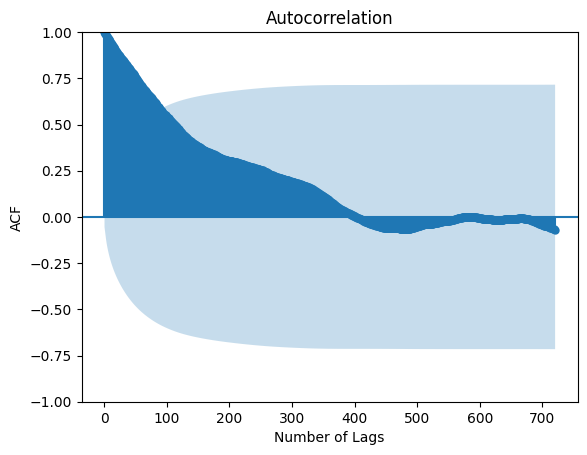

In [40]:
# plot autocorrelation function(ACF)

sm.graphics.tsa.plot_acf(df_aapl.AAPL, lags=720)
plt.xlabel('Number of Lags')
plt.ylabel('ACF')
plt.show()

# Classical Methods

In [41]:
import datetime

ticker = ['AAPL', 'MSFT']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 1, 1)
stock_prices = yf.download(ticker, start, end, interval='1d').Close

[*********************100%***********************]  2 of 2 completed


In [42]:
stock_prices.head(3)

Ticker,AAPL,MSFT
Date,,
2019-01-02,37.667175,95.310539
2019-01-03,33.915249,91.804260
2019-01-04,35.363075,96.074005


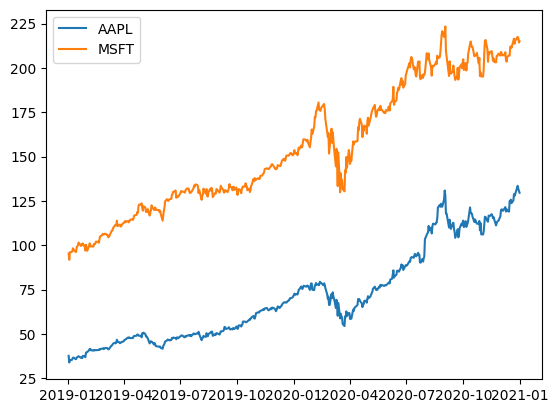

In [43]:
import matplotlib.pyplot as plt

plt.plot(stock_prices.AAPL, label='AAPL')
plt.plot(stock_prices.MSFT, label='MSFT')
plt.legend()
plt.show()

## Stationary Assumption

Classical time series models typically assume that the underlying data is stationary. Stationarity describes that the time-series has
- Constant mean and mean is not time-dependent
- Constant variance and variance is not time-dependent
- Constant covariance and covariance is not time-dependent

![](https://towardsdatascience.com/wp-content/uploads/2023/04/10vp3L0WZV_HkqS53H6skjg.png)

**[Augmented Dickey-Fuller (ADF) test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)**: If the p-value is low (< 0.05), the series is stationary.

In [44]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for stationarity
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

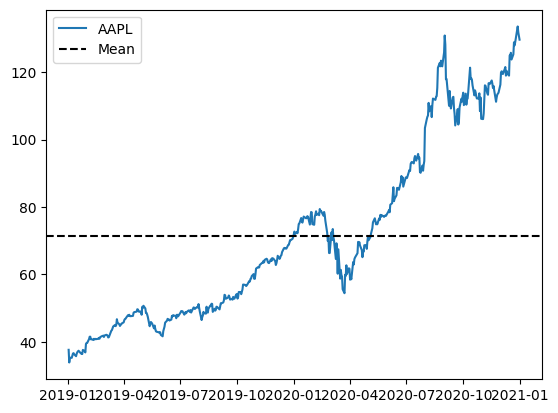

In [45]:
plt.plot(stock_prices.AAPL, label='AAPL')
plt.axhline(y=stock_prices.AAPL.mean(), color='black', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [46]:
print(f"Testing the stationarity of the AAPL stock price")
adf_test(stock_prices.AAPL)
print(f"Testing the stationarity of the MSFT stock price")
adf_test(stock_prices.MSFT)

Testing the stationarity of the AAPL stock price
ADF Statistic: 0.3193967529177845
p-value: 0.9782171043978016
The series is non-stationary.
Testing the stationarity of the MSFT stock price
ADF Statistic: -0.7445058376214995
p-value: 0.8348823707574802
The series is non-stationary.


In [47]:
print(f"Testing the stationarity of the AAPL stock price with difference transformation")
adf_test(stock_prices.AAPL.diff().dropna())
print(f"Testing the stationarity of the MSFT stock price with difference transformation")
adf_test(stock_prices.MSFT.diff().dropna())

Testing the stationarity of the AAPL stock price with difference transformation
ADF Statistic: -7.013871143180786
p-value: 6.811536287141477e-10
The series is stationary.
Testing the stationarity of the MSFT stock price with difference transformation
ADF Statistic: -7.190232875799862
p-value: 2.514813465298105e-10
The series is stationary.


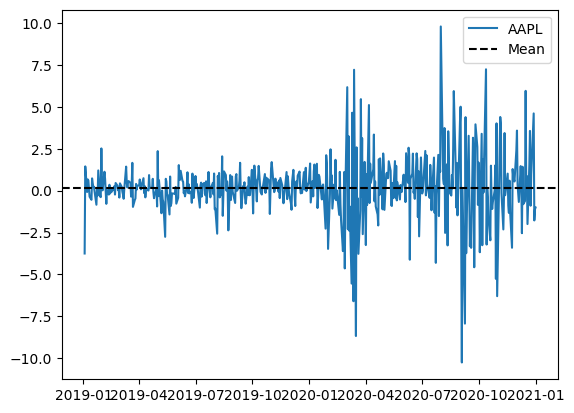

In [48]:
diff_aapl = stock_prices.AAPL.diff().dropna()

plt.plot(diff_aapl, label='AAPL')
plt.axhline(y=diff_aapl.mean(), color='black', linestyle='--', label='Mean')
plt.legend()
plt.show()

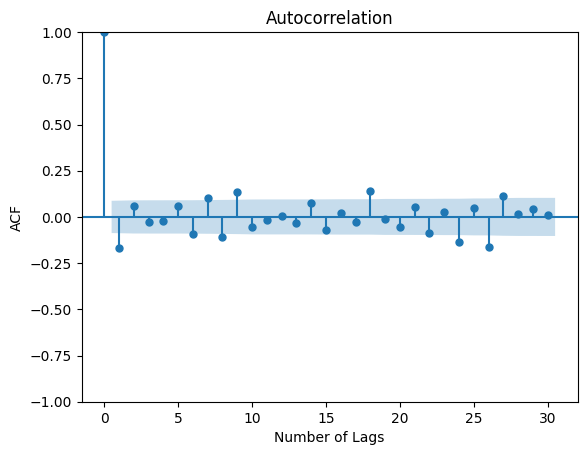

In [49]:
sm.graphics.tsa.plot_acf(diff_aapl, lags=30)
plt.xlabel('Number of Lags')
plt.ylabel('ACF')
plt.show()

## Moving Average Model

In [50]:
diff_stock_prices = stock_prices.diff().dropna()
split = int(len(diff_stock_prices['AAPL'].values) * 0.95)
diff_train_aapl = diff_stock_prices['AAPL'].iloc[:split]
diff_test_aapl = diff_stock_prices['AAPL'].iloc[split:]
diff_train_msft = diff_stock_prices['MSFT'].iloc[:split]
diff_test_msft = diff_stock_prices['MSFT'].iloc[split:]

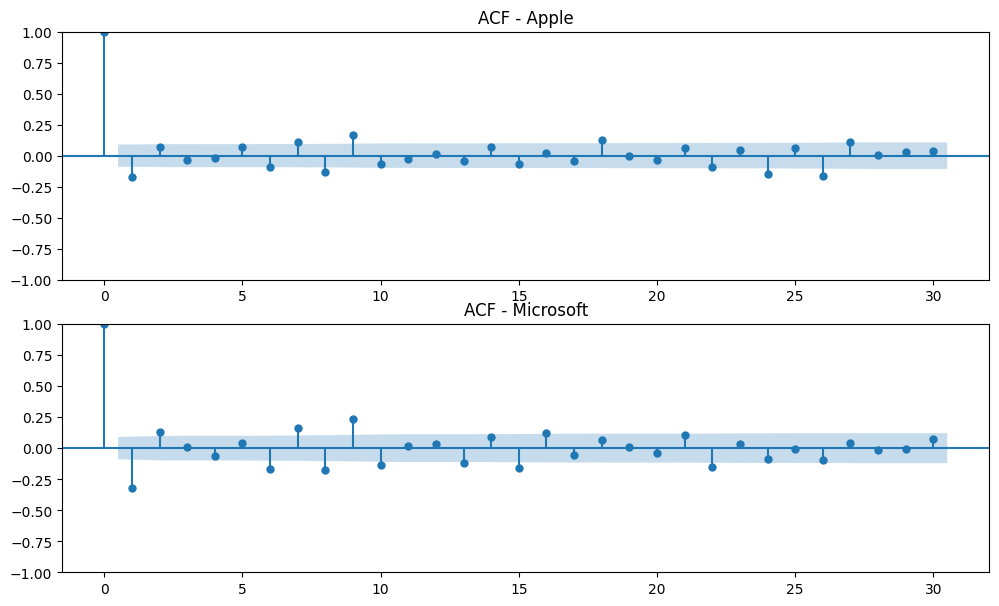

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plt.tight_layout() 
sm.graphics.tsa.plot_acf(diff_train_aapl,lags=30,
                         ax=ax[0], title='ACF - Apple')
sm.graphics.tsa.plot_acf(diff_train_msft,lags=30,
                         ax=ax[1], title='ACF - Microsoft')
plt.show()

We can see that there are significant spikes at some lags and, therefore, we’ll choose lag 9 for the short MA model and 22 for the long MA for Apple. These imply that an order of 9 will be our short-term order and 22 will be our long-term order in modeling MA

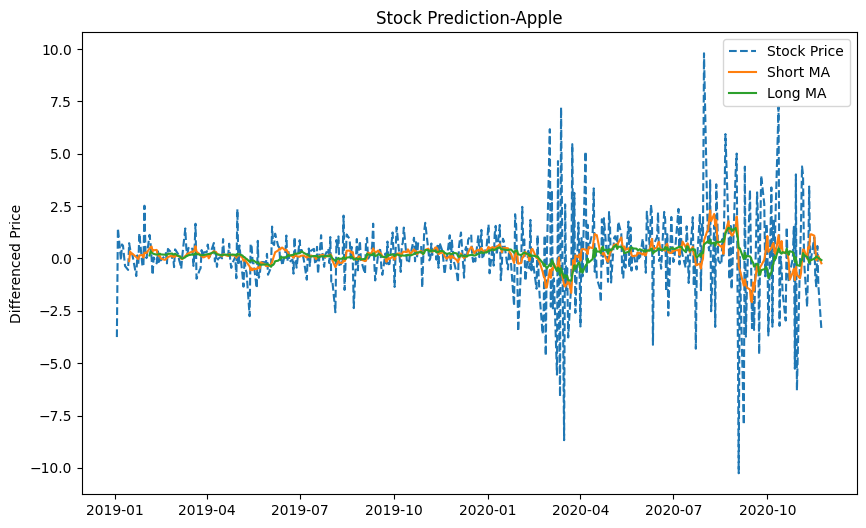

In [52]:
short_moving_average_appl = diff_train_aapl.rolling(window=9).mean()
long_moving_average_appl = diff_train_aapl.rolling(window=22).mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_aapl.loc[start:end].index, 
        diff_train_aapl.loc[start:end],
        label='Stock Price', linestyle='--')
ax.plot(short_moving_average_appl.loc[start:end].index, 
        short_moving_average_appl.loc[start:end],
        label = 'Short MA', linestyle='solid')
ax.plot(long_moving_average_appl.loc[start:end].index, 
        long_moving_average_appl.loc[start:end],
        label = 'Long MA', linestyle='solid')
ax.legend(loc='best')
ax.set_ylabel('Differenced Price')
ax.set_title('Stock Prediction-Apple')
plt.show()

The short-term MA tends to be more responsive to daily changes in Apple’s stock price compared to the long-term MA. This makes sense because taking into account a long MA generates smoother predictions.

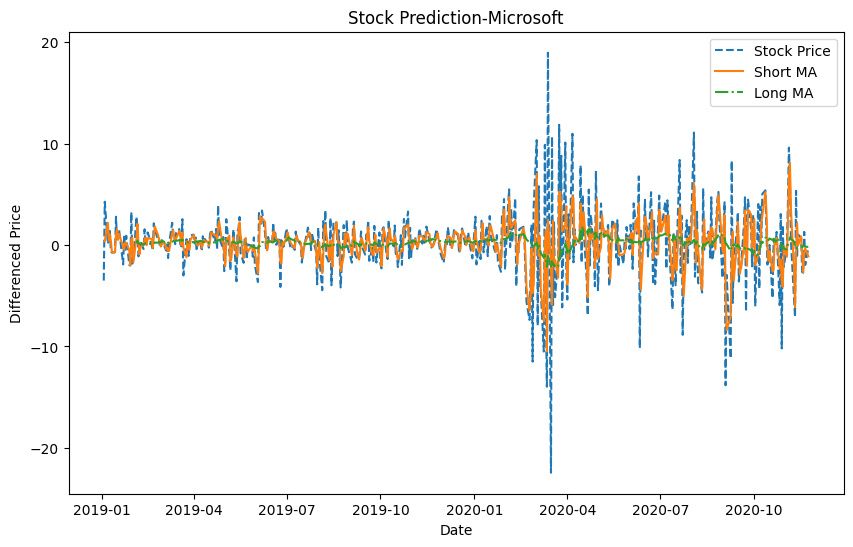

In [53]:
short_moving_average_msft = diff_train_msft.rolling(window=2).mean()
long_moving_average_msft = diff_train_msft.rolling(window=22).mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_msft.loc[start:end].index,
        diff_train_msft.loc[start:end],
        label='Stock Price', linestyle='--')
ax.plot(short_moving_average_msft.loc[start:end].index,
        short_moving_average_msft.loc[start:end],
        label = 'Short MA', linestyle='solid')
ax.plot(long_moving_average_msft.loc[start:end].index,
        long_moving_average_msft.loc[start:end],
        label = 'Long MA', linestyle='-.')
ax.legend(loc='best')
ax.set_ylabel('Differenced Price')
ax.set_xlabel('Date')
ax.set_title('Stock Prediction-Microsoft')
plt.show()

## Autoregressive Model

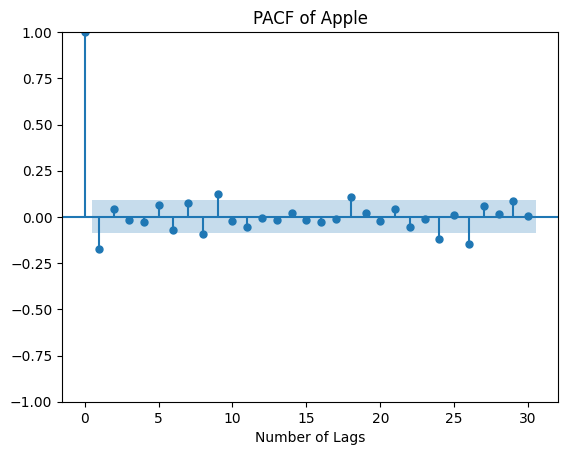

In [54]:
sm.graphics.tsa.plot_pacf(diff_train_aapl, lags=30)
plt.title('PACF of Apple')
plt.xlabel('Number of Lags')
plt.show()

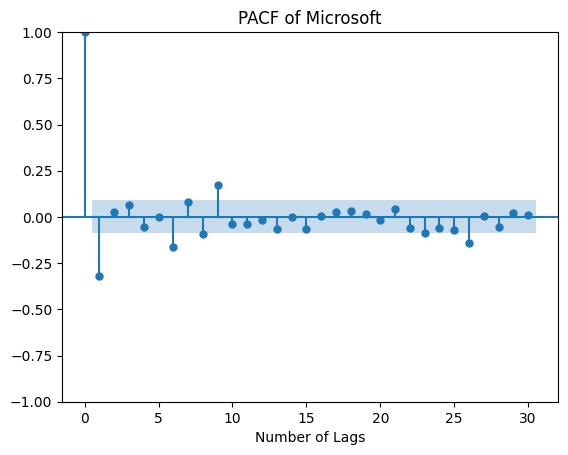

In [55]:
sm.graphics.tsa.plot_pacf(diff_train_msft, lags=30)
plt.title('PACF of Microsoft')
plt.xlabel('Number of Lags')
plt.show()

In [56]:
from statsmodels.tsa.ar_model import AutoReg

ar_aapl = AutoReg(diff_train_aapl.values, lags=29)
ar_fitted_aapl = ar_aapl.fit()

In [57]:
ar_predictions_aapl = ar_fitted_aapl.predict(start=len(diff_train_aapl), 
                                             end=len(diff_train_aapl)\
                                             + len(diff_test_aapl) - 1, 
                                             dynamic=False)

In [58]:
for i in range(len(ar_predictions_aapl)):
    print('==' * 25)
    print('predicted values:{:.4f} & actual values:{:.4f}'\
          .format(ar_predictions_aapl[i], diff_test_aapl[i]))

predicted values:1.6069 & actual values:1.2893
predicted values:-0.8302 & actual values:0.8400
predicted values:-0.9754 & actual values:0.5470
predicted values:1.1071 & actual values:2.4029
predicted values:-0.1099 & actual values:3.5848
predicted values:1.7415 & actual values:0.3516
predicted values:-0.8556 & actual values:-0.1367
predicted values:1.7161 & actual values:-0.6740
predicted values:-1.4796 & actual values:1.4652
predicted values:1.8011 & actual values:0.6154
predicted values:-1.2258 & actual values:-2.5396
predicted values:-0.5260 & actual values:1.4261
predicted values:-0.1108 & actual values:-0.8107
predicted values:-0.5905 & actual values:-0.6154
predicted values:1.2516 & actual values:5.9584
predicted values:0.2538 & actual values:-0.0684
predicted values:0.4329 & actual values:0.8694
predicted values:-1.2680 & actual values:-1.9926
predicted values:0.5774 & actual values:1.5335
predicted values:0.2326 & actual values:3.5652
predicted values:0.0167 & actual values:-0.

/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_85463/3994535184.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .format(ar_predictions_aapl[i], diff_test_aapl[i]))


In [59]:
import pandas as pd

ar_predictions_aapl = pd.DataFrame(ar_predictions_aapl)
ar_predictions_aapl.index = diff_test_aapl.index

In [60]:
ar_msft = AutoReg(diff_train_msft.values, lags=26)
ar_fitted_msft = ar_msft.fit()

ar_predictions_msft = ar_fitted_msft.predict(start=len(diff_train_msft), 
                                             end=len(diff_train_msft)\
                                             +len(diff_test_msft) - 1,
                                             dynamic=False)

ar_predictions_msft = pd.DataFrame(ar_predictions_msft)
ar_predictions_msft.index = diff_test_msft.index

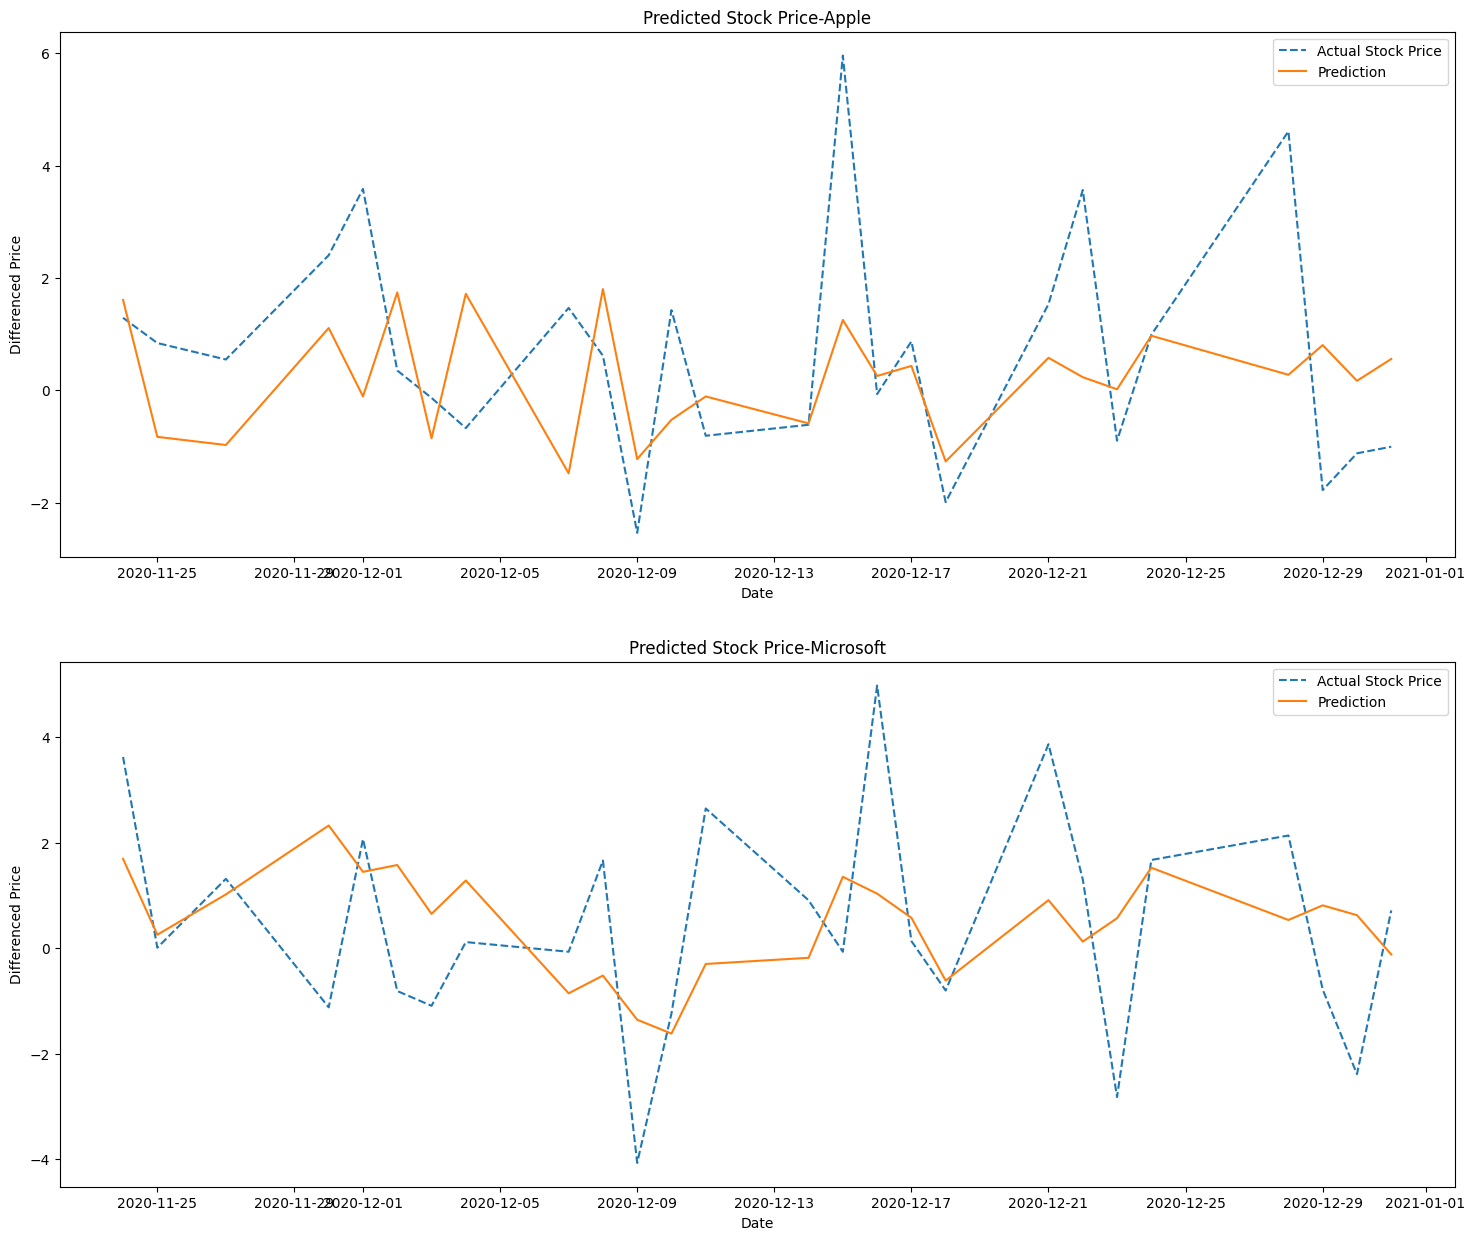

In [61]:
fig, ax = plt.subplots(2,1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(ar_predictions_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(ar_predictions_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()

## Autoregressive Integrated Moving Average Model

In [62]:
adf_test(stock_prices.AAPL)

ADF Statistic: 0.3193967529177845
p-value: 0.9782171043978016
The series is non-stationary.


In [63]:
adf_test(stock_prices.MSFT)

ADF Statistic: -0.7445058376214995
p-value: 0.8348823707574802
The series is non-stationary.


25


/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xiangshiyin/Documents/Teach

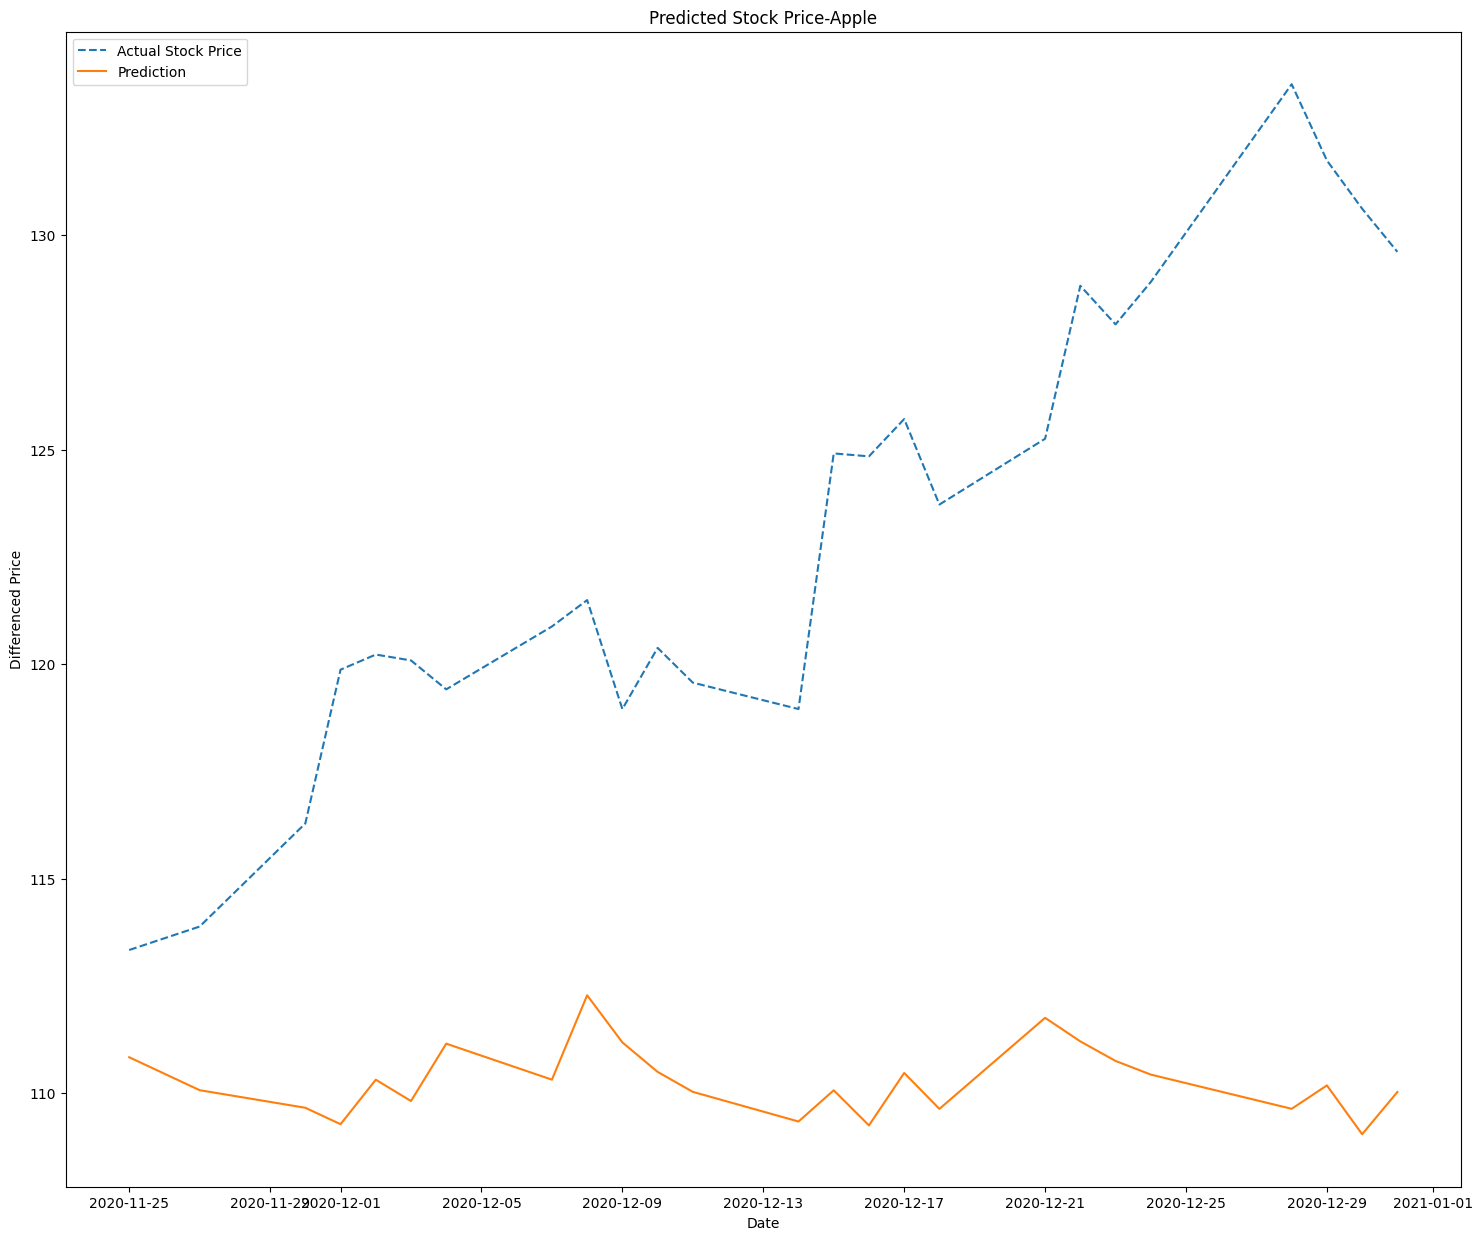

In [64]:
from statsmodels.tsa.arima.model import ARIMA

aapl = stock_prices['AAPL']
size_test = int(len(aapl) * 0.05)
print(size_test)

train_aapl = aapl[:-size_test]
test_aapl = aapl[-size_test:]
diff_aapl_full = aapl.diff().dropna()
diff_train_aapl = train_aapl.diff().dropna()

arima_aapl = ARIMA(train_aapl,order=(9, 1, 9))
arima_fit_aapl = arima_aapl.fit()
arima_pred_aapl = arima_fit_aapl.forecast(steps=size_test)
arima_pred_aapl.index = test_aapl.index

fig, ax = plt.subplots(figsize=(18, 15))
ax.plot(aapl[-size_test:], label='Actual Stock Price', linestyle='--')
ax.plot(arima_pred_aapl, linestyle='solid', label="Prediction")
ax.set_title('Predicted Stock Price-Apple')
ax.legend(loc='best')
ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()

In [65]:
test_aapl.head(3)

Date
2020-11-25    113.335907
2020-11-27    113.882896
2020-11-30    116.285789
Name: AAPL, dtype: float64

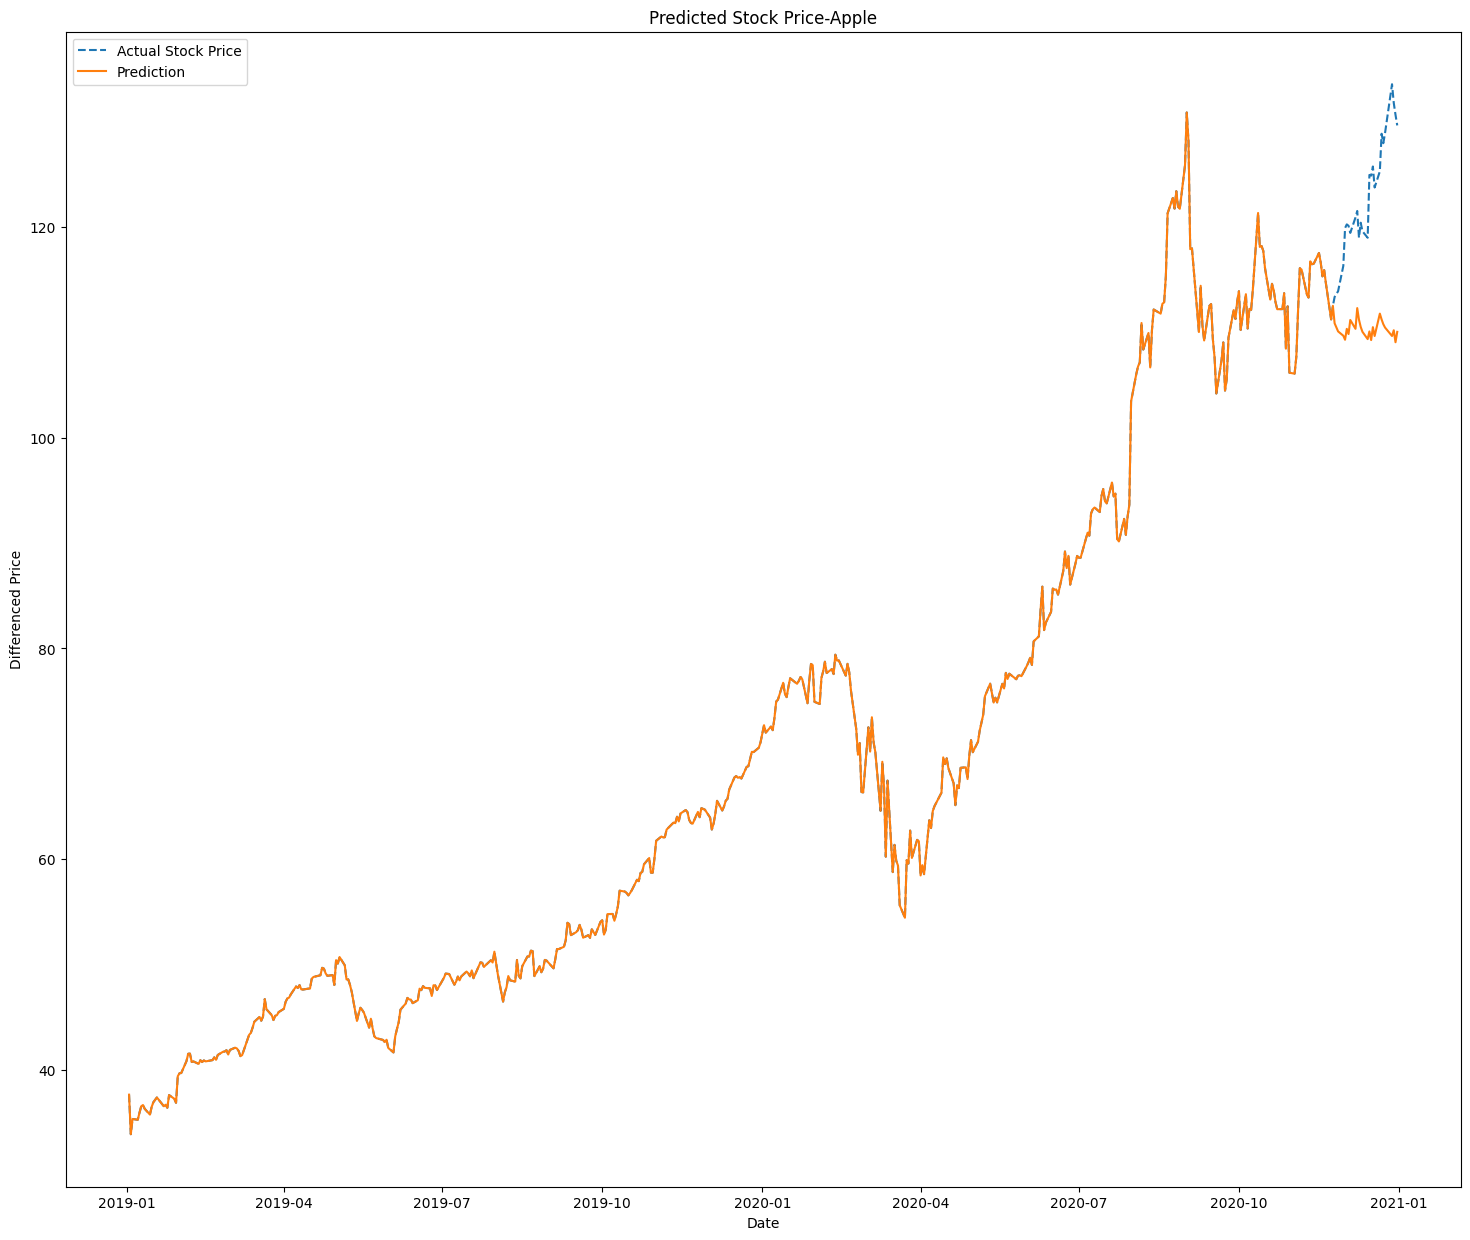

In [66]:
fig, ax = plt.subplots(figsize=(18, 15))
ax.plot(aapl, label='Actual Stock Price', linestyle='--')
ax.plot(pd.concat([train_aapl, arima_pred_aapl],axis=0), linestyle='solid', label="Prediction")
ax.set_title('Predicted Stock Price-Apple')
ax.legend(loc='best')
ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()

In [48]:
# import itertools
# p = q = range(0, 9)
# d = range(0, 3)
# pdq = list(itertools.product(p, d, q))
# arima_results_aapl = []
# for param_set in pdq:
#     try:
#         arima_aapl = ARIMA(diff_train_aapl, order=param_set)
#         arima_fitted_aapl = arima_aapl.fit()
#         arima_results_aapl.append(arima_fitted_aapl.aic)
#     except:
#         continue
# print('**'*25)
# print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'
#       .format(pd.DataFrame(arima_results_aapl)
#              .where(pd.DataFrame(arima_results_aapl).T.notnull().all()).min()[0], 
#              pdq[arima_results_aapl.index(min(arima_results_aapl))]))

In [ ]:
arima_fit_aapl.summary()

AIC vs. BIC

## **1️⃣ Akaike Information Criterion (AIC)**  
$$
AIC = -2 ln(L) + 2k
$$
Where:  
- L = Maximum likelihood of the model  
- k = Number of estimated parameters in the model  
- -2 ln(L) = Measures model fit (lower is better)  
- 2k = Penalizes complexity (more parameters increase AIC)  

---

## **2️⃣ Bayesian Information Criterion (BIC)**  
$$
BIC = -2 ln(L) + k ln(n)
$$
Where:  
- n = Number of observations (sample size)  
- k = Number of parameters  
- ln(n) grows with larger samples → **Stronger penalty for complexity**  

---

## **3️⃣ Comparison of AIC vs. BIC**
| Criterion | Formula | Penalization for Complexity |
|-----------|---------|---------------------------|
| **AIC** | -2 ln(L) + 2k | **Less strict** (penalty = 2k) |
| **BIC** | -2 ln(L) + k ln(n) | **Stronger penalty** (depends on sample size n) |

🔹 **AIC prefers models with better fit** but allows more complexity.  
🔹 **BIC prefers simpler models**, especially for larger datasets.

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

score_mae = mean_absolute_error(test_aapl, arima_pred_aapl)
score_rmse = np.sqrt(mean_squared_error(test_aapl, arima_pred_aapl))

print("MAE: ", score_mae)
print("RMSE: ", score_rmse)

MAE:  12.866775952061351
RMSE:  13.990613976196226


In [ ]:
train_aapl.head(3)

# Other Approaches

## Prophet

Facebook's Prophet is an open-source time series forecasting tool designed for automatic forecasting with minimal manual tuning. It is particularly useful for business and economic time series data with strong seasonality and holiday effects.

In [68]:
df_train_aapl = train_aapl.reset_index().rename(columns={'Date': 'ds', 'AAPL': 'y'})
df_train_aapl.head(5)

,ds,y
0,2019-01-02,37.667175
1,2019-01-03,33.915249
2,2019-01-04,35.363075
3,2019-01-07,35.284363
4,2019-01-08,35.956993


In [69]:
test_aapl.shape

(25,)

In [74]:
test_aapl.index.min(), test_aapl.index.max()

(Timestamp('2020-11-25 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from prophet import Prophet


# Train the model
model = Prophet()
model.fit(df_train_aapl)

size = 37
x_valid = model.make_future_dataframe(periods=size, freq='d')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
df_test_aapl = test_aapl.reset_index().rename(columns={'Date': 'ds', 'AAPL': 'y'})
df_y_pred = y_pred.tail(size)[['ds', 'yhat']]
df_combo = pd.merge(df_test_aapl, df_y_pred, on='ds', how='inner')

score_mae = mean_absolute_error(df_combo.y, df_combo.yhat)
score_rmse = math.sqrt(mean_squared_error(df_combo.y, df_combo.yhat))

print("MAE: ", score_mae)
print("RMSE: ", score_rmse)

/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
21:19:39 - cmdstanpy - INFO - Chain [1] start processing
21:19:39 - cmdstanpy - INFO - Chain [1] done processing


MAE:  3.548437360985425
RMSE:  4.280002962722468


In [76]:
x_valid2 = x_valid[x_valid.ds.dt.weekday < 5]

# Predict on valid set
y_pred = model.predict(x_valid2)
# print(len(y_pred))
y_pred[:5]

# # Calcuate metrics
# df_test_aapl = test_aapl.reset_index().rename(columns={'Date': 'ds', 'AAPL': 'y'})
# df_y_pred = y_pred.tail(size)[['ds', 'yhat']]
# df_combo = pd.merge(df_test_aapl, df_y_pred, on='ds', how='inner')

# score_mae = mean_absolute_error(df_combo.y, df_combo.yhat)
# score_rmse = math.sqrt(mean_squared_error(df_combo.y, df_combo.yhat))

# print("MAE: ", score_mae)
# print("RMSE: ", score_rmse)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,37.337318,31.871734,42.970259,37.337318,37.337318,0.232282,0.232282,0.232282,0.232282,0.232282,0.232282,0.0,0.0,0.0,37.569599
1,2019-01-03,37.415841,31.566130,43.473250,37.415841,37.415841,0.010063,0.010063,0.010063,0.010063,0.010063,0.010063,0.0,0.0,0.0,37.425904
2,2019-01-04,37.494365,31.318919,43.213433,37.494365,37.494365,-0.072305,-0.072305,-0.072305,-0.072305,-0.072305,-0.072305,0.0,0.0,0.0,37.422060
3,2019-01-07,37.729937,31.603461,43.231721,37.729937,37.729937,-0.254685,-0.254685,-0.254685,-0.254685,-0.254685,-0.254685,0.0,0.0,0.0,37.475251
4,2019-01-08,37.808461,32.066786,43.754179,37.808461,37.808461,-0.098488,-0.098488,-0.098488,-0.098488,-0.098488,-0.098488,0.0,0.0,0.0,37.709973


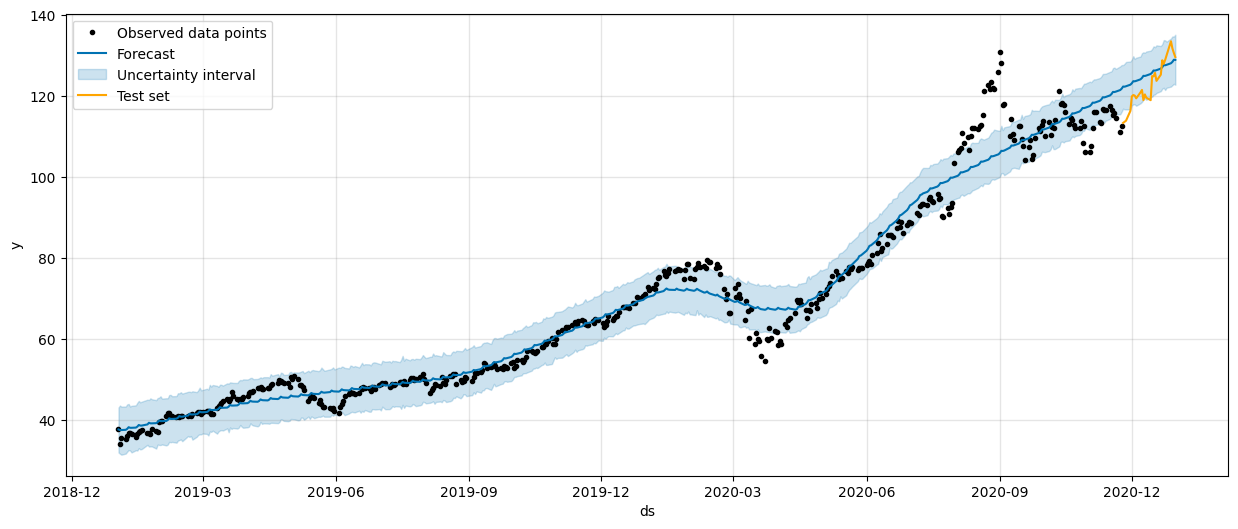

In [77]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
plt.plot(test_aapl, label="Test set", color="orange")
plt.legend()
plt.show()

| Feature                 | **Prophet**                        | **ARIMA**                          |
|-------------------------|----------------------------------|----------------------------------|
| **Ease of Use**         | ✅ Easy (automated)             | ❌ Requires manual tuning       |
| **Handles Missing Data** | ✅ Yes                           | ❌ No                           |
| **Captures Trend**      | ✅ Yes (automatically)          | ✅ Yes (differencing needed)   |
| **Handles Seasonality** | ✅ Yes (Fourier terms)         | ✅ Yes (SARIMA needed)        |
| **Holiday Effects**     | ✅ Yes (built-in)              | ❌ No (must be manually engineered) |
| **Best For**            | Business, finance, irregular data | Statistical modeling, short-term forecasting |
| **Works with Short Time Series?** | ❌ Not ideal    | ✅ Yes |

## From a `time series` problem to a `supervised` problem



In [78]:
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
print(df)

   t
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


In [79]:
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-1'] = df['t'].shift(1)
print(df)


   t  t-1
0  0  NaN
1  1  0.0
2  2  1.0
3  3  2.0
4  4  3.0
5  5  4.0
6  6  5.0
7  7  6.0
8  8  7.0
9  9  8.0


In [80]:

from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t+1'] = df['t'].shift(-1)
print(df)

   t  t+1
0  0  1.0
1  1  2.0
2  2  3.0
3  3  4.0
4  4  5.0
5  5  6.0
6  6  7.0
7  7  8.0
8  8  9.0
9  9  NaN


In [81]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [82]:
values = [x for x in range(10)]
data = series_to_supervised(values)
print(data)

   var1(t-1)  var1(t)
1        0.0        1
2        1.0        2
3        2.0        3
4        3.0        4
5        4.0        5
6        5.0        6
7        6.0        7
8        7.0        8
9        8.0        9


In [83]:
values = [x for x in range(10)]
data = series_to_supervised(values, n_in=3)
print(data)

   var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3        0.0        1.0        2.0        3
4        1.0        2.0        3.0        4
5        2.0        3.0        4.0        5
6        3.0        4.0        5.0        6
7        4.0        5.0        6.0        7
8        5.0        6.0        7.0        8
9        6.0        7.0        8.0        9


In [84]:
values = [x for x in range(10)]
data = series_to_supervised(values, n_out=3)
print(data)

   var1(t-1)  var1(t)  var1(t+1)  var1(t+2)
1        0.0        1        2.0        3.0
2        1.0        2        3.0        4.0
3        2.0        3        4.0        5.0
4        3.0        4        5.0        6.0
5        4.0        5        6.0        7.0
6        5.0        6        7.0        8.0
7        6.0        7        8.0        9.0


### Example: AAPL - Random Forest

In [85]:
aapl.head(3)

Date
2019-01-02    37.667175
2019-01-03    33.915249
2019-01-04    35.363075
Name: AAPL, dtype: float64

In [88]:
data = aapl.reset_index().rename(columns={'Date':'ds', 'AAPL':'y'})
data = data.set_index('ds')
data.head(3)

,y
ds,
2019-01-02,37.667175
2019-01-03,33.915249
2019-01-04,35.363075


In [89]:
# x = data['y'].shift(6).rolling(window=19).mean().dropna()
# x.head(5)

In [90]:
data.shape

(505, 1)

In [91]:
for i in range(6, 25):
    data[f'lag_{i}'] = data['y'].shift(i)

# data['hour'] = data.index.hour
data['weekday'] = data.index.weekday
data = data.dropna()

data.head(3)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,weekday
ds,,,,,,,,,,,,,,,,,,,,,
2019-02-06,41.559830,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,37.175827,36.956387,...,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,33.915249,37.667175,2
2019-02-07,40.772720,39.415550,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,37.175827,...,36.510357,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,33.915249,3
2019-02-08,40.820629,39.699375,39.415550,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,...,36.956387,36.510357,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,4


In [92]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [93]:
data.head(3)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,weekday
ds,,,,,,,,,,,,,,,,,,,,,
2019-02-06,41.559830,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,37.175827,36.956387,36.510357,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,33.915249,37.667175,2
2019-02-07,40.772720,39.415550,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,37.175827,36.956387,36.510357,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,33.915249,3
2019-02-08,40.820629,39.699375,39.415550,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,37.175827,36.956387,36.510357,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,4


In [96]:
lag_cols = [col for col in data.columns if 'lag' in col]
data['rolling_mean'] = data[lag_cols].mean(axis=1)

# extract out the features and labels into separate variables
y = data['y'].values
data2 = data.drop('y', axis=1)

X = data2.values
feature_names = data2.columns
print('dimension: ', X.shape)
data2.head(3)

dimension:  (481, 21)


,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,weekday,rolling_mean
ds,,,,,,,,,,,,,,,,,,,,,
2019-02-06,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,37.175827,36.956387,36.510357,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,33.915249,37.667175,2,36.478596
2019-02-07,39.415550,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,37.175827,36.956387,36.510357,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,33.915249,3,36.570615
2019-02-08,39.699375,39.415550,36.894379,37.280788,37.629005,36.422104,36.713108,36.565220,37.404808,37.175827,36.956387,36.510357,35.778103,36.324303,36.684467,36.567604,35.956993,35.284363,35.363075,4,36.875043


In [97]:
def train_test_split(X, y, test_size):
    """Perform train-test split with respect to time series structure."""
    test_index = int(len(X) * (1 - test_size))
    X_train = X[:test_index]
    X_test = X[test_index:]
    y_train = y[:test_index]
    y_test = y[test_index:]
    return X_train, X_test, y_train, y_test

In [98]:
test_size = 0.05
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size)

In [99]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
prediction = rfr.predict(X_test)

score_mae = mean_absolute_error(y_test, prediction)
score_rmse = np.sqrt(mean_squared_error(y_test, prediction))

print("MAE: ", score_mae)
print("RMSE: ", score_rmse)

MAE:  11.37257289123535
RMSE:  13.207664821446192


In [100]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

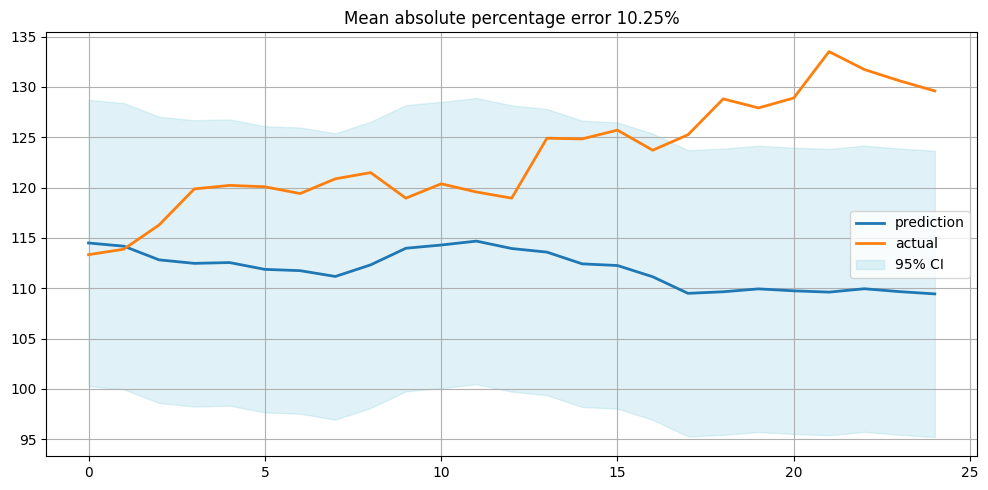

In [101]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

plt.figure(figsize=(10,5))
x = range(prediction.size)
plt.plot(x, prediction, label='prediction', linewidth=2.0)
plt.plot(x, y_test, label='actual', linewidth=2.0)


timeseries_cv = TimeSeriesSplit(n_splits=5)
cv = cross_val_score(rfr, X_train, y_train, 
                        cv=timeseries_cv, scoring='neg_mean_absolute_error')
mae = -1 * cv.mean()
deviation = cv.std()

# hard-coded to be 95% confidence interval
scale = 1.96
margin_error = mae + scale * deviation
lower = prediction - margin_error
upper = prediction + margin_error

fill_alpha = 0.2
fill_color = '#66C2D7'
plt.fill_between(x, lower, upper, color=fill_color, alpha=fill_alpha, label='95% CI')      

# if plot_anomalies:
#     anomalies = np.array([np.nan] * len(y_test))
#     anomalies[y_test < lower] = y_test[y_test < lower]
#     anomalies[y_test > upper] = y_test[y_test > upper]
#     plt.plot(anomalies, 'o', markersize=10, label='Anomalies')

error = mean_absolute_percentage_error(prediction, y_test)
plt.title('Mean absolute percentage error {0:.2f}%'.format(error))
plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)

In [102]:
importances = rfr.feature_importances_
feature_names = data2.columns
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
0,lag_6,0.544092
1,lag_7,0.149403
2,lag_8,0.083345
3,lag_9,0.063612
20,rolling_mean,0.060657
13,lag_19,0.030119
4,lag_10,0.029848
12,lag_18,0.005417
7,lag_13,0.004471
9,lag_15,0.004211


### Example: AAPL - XGBoost

In [103]:
## using Xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimator=20,
    learning_rate=0.1,
    random_state=123,
)
xgb_reg.fit(X_train, y_train)

/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=20, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [104]:
y_pred_xgb = xgb_reg.predict(X_test)
score_mae = mean_absolute_error(y_test, y_pred_xgb)
score_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("MAE: ", score_mae)
print("RMSE: ", score_rmse)

MAE:  10.533048400878906
RMSE:  11.944993577329392


In [105]:
importances_xgb = xgb_reg.feature_importances_
feature_names_xgb = data2.columns
# Create a DataFrame for better visualization
feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': importances_xgb})
# Sort by importance (highest first)
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

feature_importance_df_xgb

,Feature,Importance
0,lag_6,0.526295
2,lag_8,0.098961
14,lag_20,0.086200
3,lag_9,0.082883
9,lag_15,0.058548
1,lag_7,0.040848
13,lag_19,0.024806
20,rolling_mean,0.021671
12,lag_18,0.014230
18,lag_24,0.009405


/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/xiangshiyin/Documents/Teaching/machine-learning-for-actuarial-science/.venv/lib/python3

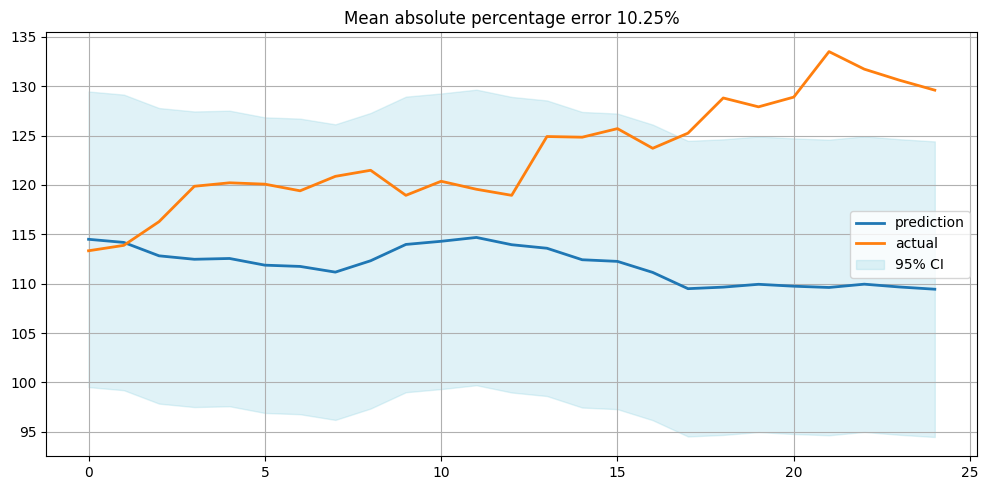

In [106]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

plt.figure(figsize=(10,5))
x = range(prediction.size)
plt.plot(x, prediction, label='prediction', linewidth=2.0)
plt.plot(x, y_test, label='actual', linewidth=2.0)


timeseries_cv = TimeSeriesSplit(n_splits=5)
cv = cross_val_score(xgb_reg, X_train, y_train, 
                        cv=timeseries_cv, scoring='neg_mean_absolute_error')
mae = -1 * cv.mean()
deviation = cv.std()

# hard-coded to be 95% confidence interval
scale = 1.96
margin_error = mae + scale * deviation
lower = prediction - margin_error
upper = prediction + margin_error

fill_alpha = 0.2
fill_color = '#66C2D7'
plt.fill_between(x, lower, upper, color=fill_color, alpha=fill_alpha, label='95% CI')      

# if plot_anomalies:
#     anomalies = np.array([np.nan] * len(y_test))
#     anomalies[y_test < lower] = y_test[y_test < lower]
#     anomalies[y_test > upper] = y_test[y_test > upper]
#     plt.plot(anomalies, 'o', markersize=10, label='Anomalies')

error = mean_absolute_percentage_error(prediction, y_test)
plt.title('Mean absolute percentage error {0:.2f}%'.format(error))
plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)